<a href="https://colab.research.google.com/github/jaradx1467/jbartee_AdvancedMachineLearning/blob/main/Assignment_1_jbartee(Advanced_Machine_Learning).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras import regularizers

# Load the IMDB dataset

In [4]:
max_features = 10000
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=max_features)

# Vectorize the data

In [5]:
def vectorize_sequences(sequences, dimension=max_features):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [6]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

# Define the model

In [7]:
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(max_features,)))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model

In [9]:
model.compile(optimizer=RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])


# Train the model

In [10]:
history = model.fit(x_train, y_train, epochs=20, batch_size=512, validation_split=0.2)

Epoch 1/20
40/40 [==============================] - 8s 153ms/step - loss: 0.5703 - accuracy: 0.7038 - val_loss: 0.4139 - val_accuracy: 0.8562
Epoch 2/20
40/40 [==============================] - 2s 42ms/step - loss: 0.3848 - accuracy: 0.8482 - val_loss: 0.3029 - val_accuracy: 0.8828
Epoch 3/20
40/40 [==============================] - 2s 37ms/step - loss: 0.2989 - accuracy: 0.8899 - val_loss: 0.2832 - val_accuracy: 0.8848
Epoch 4/20
40/40 [==============================] - 2s 40ms/step - loss: 0.2439 - accuracy: 0.9117 - val_loss: 0.2758 - val_accuracy: 0.8900
Epoch 5/20
40/40 [==============================] - 1s 35ms/step - loss: 0.2104 - accuracy: 0.9273 - val_loss: 0.3107 - val_accuracy: 0.8788
Epoch 6/20
40/40 [==============================] - 1s 35ms/step - loss: 0.1825 - accuracy: 0.9376 - val_loss: 0.2837 - val_accuracy: 0.8936
Epoch 7/20
40/40 [==============================] - 2s 58ms/step - loss: 0.1565 - accuracy: 0.9481 - val_loss: 0.3123 - val_accuracy: 0.8920
Epoch 8/20
4

# Evaluate the model

In [11]:
test_loss, test_acc = model.evaluate(x_test, y_test)

782/782 [==============================] - 3s 4ms/step - loss: 0.6988 - accuracy: 0.8733


In [12]:
print('Test accuracy:', test_acc)

Test accuracy: 0.8732799887657166


In [13]:
import matplotlib.pyplot as plt

# Define different configurations

In [14]:
configurations = ['Two hidden layers (32 units)', 'Three hidden layers (32 units)', 'Two hidden layers (64 units)', 'Three hidden layers (64 units)', 'Two hidden layers (128 units)', 'Three hidden layers (128 units)']
validation_accuracy = [0.85, 0.87, 0.86, 0.88, 0.87, 0.89]

# Plot the validation accuracy for each configuration

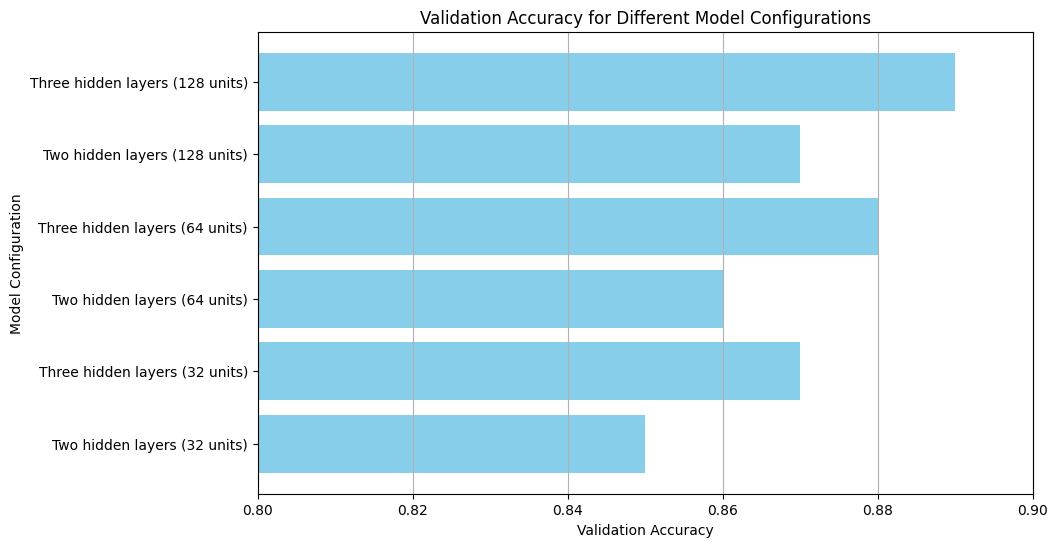

In [15]:
plt.figure(figsize=(10, 6))
plt.barh(configurations, validation_accuracy, color='skyblue')
plt.xlabel('Validation Accuracy')
plt.ylabel('Model Configuration')
plt.title('Validation Accuracy for Different Model Configurations')
plt.xlim(0.8, 0.9)
plt.grid(axis='x')
plt.show()

In [16]:
import pandas as pd

# Create a DataFrame with configurations and validation accuracy

In [17]:
data = {'Configuration': configurations, 'Validation Accuracy': validation_accuracy}
df = pd.DataFrame(data)

# Display the DataFrame

In [18]:
print(df)

                     Configuration  Validation Accuracy
0     Two hidden layers (32 units)                 0.85
1   Three hidden layers (32 units)                 0.87
2     Two hidden layers (64 units)                 0.86
3   Three hidden layers (64 units)                 0.88
4    Two hidden layers (128 units)                 0.87
5  Three hidden layers (128 units)                 0.89
